# 1. Importing libraries

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Load data

In [3]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [4]:
data = tf.keras.utils.image_dataset_from_directory('datasets')

Found 103 files belonging to 7 classes.


In [35]:
data_iterator = data.as_numpy_iterator()

In [36]:
batch = data_iterator.next()
# batch[0] = images, batch[1] = labels

In [37]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [38]:
batch[1]
# class 0 = Cid, 1 = Gon, 2 = Kiyotaka,3 = Light,4 = Gojo, 5 = aizen, 6 = Sukuna

array([0, 6, 3, 4, 1, 5, 4, 0, 6, 1, 1, 3, 2, 2, 1, 2, 3, 1, 5, 3, 3, 4,
       2, 3, 1, 4, 2, 3, 3, 0, 1, 4])

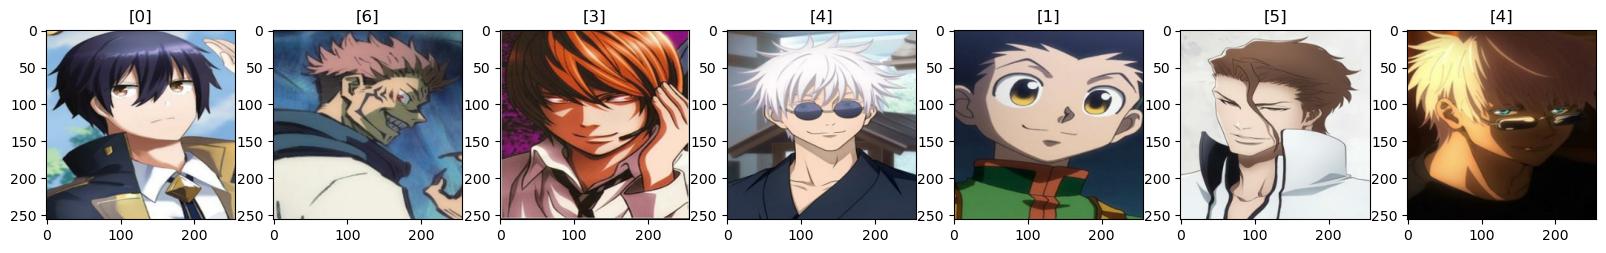

In [40]:
# Display some of the images with their labels number
fig, ax = plt.subplots(ncols= 7, figsize= (20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text([batch[1][idx]])

# 3. Preprocessing data